In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("n_movies.csv")

In [69]:
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [70]:
df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [71]:
null_cols = ['rating','genre','votes']

In [72]:
df = df.dropna(subset = null_cols)

In [32]:
avg_rating = df.groupby('title')['rating'].mean()

In [33]:
avg_rating = avg_rating.sort_values(ascending=False)

<AxesSubplot:xlabel='rating', ylabel='Count'>

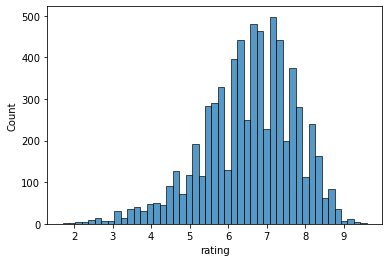

In [34]:
sns.histplot(avg_rating)

In [37]:
#converts the different genres in the form of matrix and represent the values to be true as 1 and false as 0
df_genre = df['genre'].str.get_dummies(sep='|')

In [40]:
df_genre.head(10)

,Action,"Action, Adventure","Action, Adventure, Biography","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, History","Action, Adventure, Horror",...,"Short, Horror","Short, Horror, Mystery","Short, Music","Short, Mystery, Sci-Fi","Short, Sci-Fi",Sport,Talk-Show,Thriller,Western,"Western, Adventure"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
scaler = StandardScaler()
df['normalized_rating'] = scaler.fit_transform(df[['rating']])

In [48]:
df_combined = pd.concat([df_genre, df['normalized_rating']], axis=1)

In [50]:
cosine_sim = cosine_similarity(df_combined, df_combined)

In [57]:
def get_recommendations(movie_name):
    idx = df.index[df['title'] == movie_name].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [74]:
movie = str(input("Enter the movie you like the most: "))
is_present = movie in df['title'].values
if is_present:
    print(get_recommendations(movie)) 
else:
    print("The movie you searched for is not present in the dataset")

Enter the movie you like the most: Better Call Saul
18         Peaky Blinders
9118       Peaky Blinders
8701       Narcos: Mexico
178           Delhi Crime
545     Copenhagen Cowboy
Name: title, dtype: object
